In [1]:
from PIL import Image, ImageOps
import torch
import matplotlib.pyplot as plt

import torch
from diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion_inpaint import StableDiffusionInpaintPipeline
import torchvision.transforms as T

from utils import recover_image

In [2]:
to_pil = T.ToPILImage()

### First lets instantiate an inpainting stable diffusion model

In [3]:
# make sure you're logged in with `huggingface-cli login` - check https://github.com/huggingface/diffusers for more details

pipe_inpaint: StableDiffusionInpaintPipeline = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    # revision="fp16",
    torch_dtype=torch.float16,
)
pipe_inpaint = pipe_inpaint.to("cuda")

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

### The image to fake

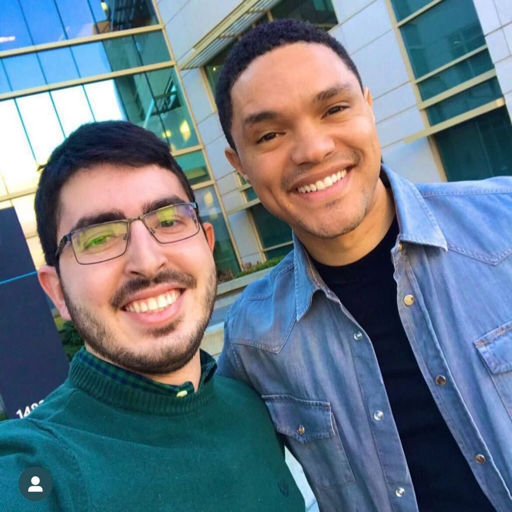

In [4]:
assets_path = "../../photoguard/assets"
init_image = Image.open(f"{assets_path}/trevor_5.jpg").convert('RGB').resize(
    (512, 512)
)
mask_image = Image.open(f"{assets_path}/trevor_5.tif").convert('RGB')
mask_image = ImageOps.invert(mask_image).resize((512, 512))

init_image

### Running Stable Diffusion Inpainting

In [5]:
# prompt = "man riding a motorcycle at night"
# prompt = "two men in a wedding"
# prompt = "two men in a restaurant hugging"
# prompt = "two men in a classroom"
# prompt = "two men in a library"
prompt = "two men in the plane hugging"

# A good seed
SEED = 9209

# Uncomment the below to generated other images
# SEED = np.random.randint(low=0, high=100000)

torch.manual_seed(SEED)
print(SEED)

strength = 0.7
guidance_scale = 7.5
num_inference_steps = 100

image_nat = pipe_inpaint(
    prompt=prompt,
    image=init_image,
    mask_image=mask_image,
    eta=1,
    num_inference_steps=num_inference_steps,
    guidance_scale=guidance_scale,
    strength=strength
).images[0]
image_nat = recover_image(image_nat, init_image, mask_image)

9209


  0%|          | 0/70 [00:00<?, ?it/s]

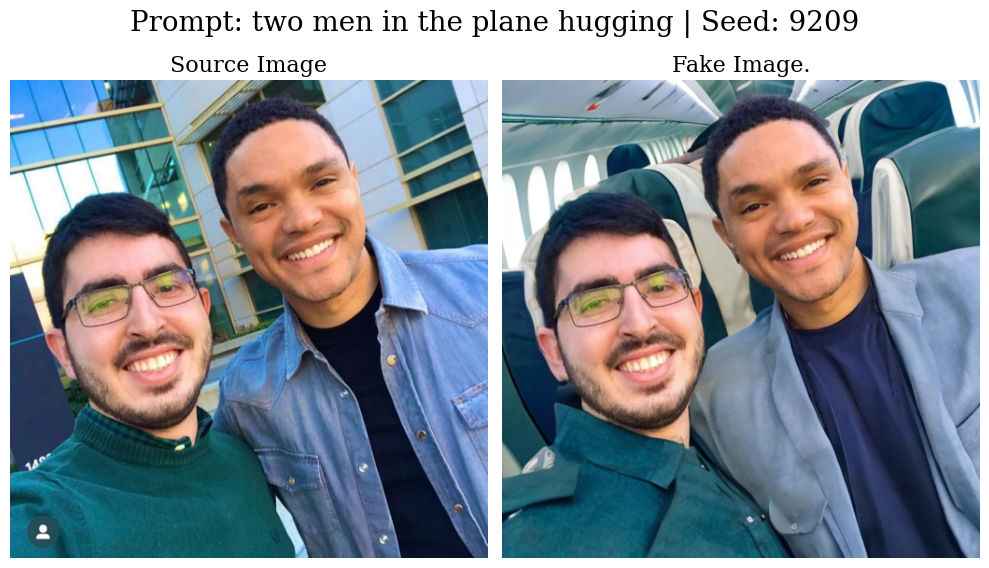

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))

ax[0].imshow(init_image)
ax[1].imshow(image_nat)

ax[0].set_title('Source Image', fontsize=16)
ax[1].set_title('Fake Image.', fontsize=16)

for i in range(2):
  ax[i].grid(False)
  ax[i].axis('off')

fig.suptitle(f"Prompt: {prompt} | Seed: {SEED}", fontsize=20)
fig.tight_layout()
plt.show()